# Seaborn Object Recipes

Ok, while we're big fans of the grammer-of-graphics model of seaborn.objects, development of additional features — a version of linear regression with confidence intervals, lowess regression — has been quite slow. 

To help address this, with the help of an *excellent* MIDS student ([Ofosu Osei](https://github.com/Ofosu-Osei)), we've created a package of extra recipes that _augments_ seaborn.objects called [seaborn_object_recipes](https://github.com/Ofosu-Osei/seaborn_objects_recipes).

To use it, just run `pip install seaborn_object_recipes`, then import it after seaborn:

```python
import seaborn.objects as so
import seaborn_objects_recipes as sor
```


## seaborn_objects_recipes Examples

You can read about all the features of seaborn_object_recipes on the [package website here](https://github.com/Ofosu-Osei/seaborn_objects_recipes), but here are a few examples of it in action.

In [2]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn_objects_recipes as sor
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("mode.copy_on_write", True)

# Load the penguins dataset
import seaborn as sns

penguins = sns.load_dataset("penguins").dropna()

### Regression with Confidence Intervals

Here's an example of using `sor.PolyFitWithCI` to plot a regression with confidence intervals. 

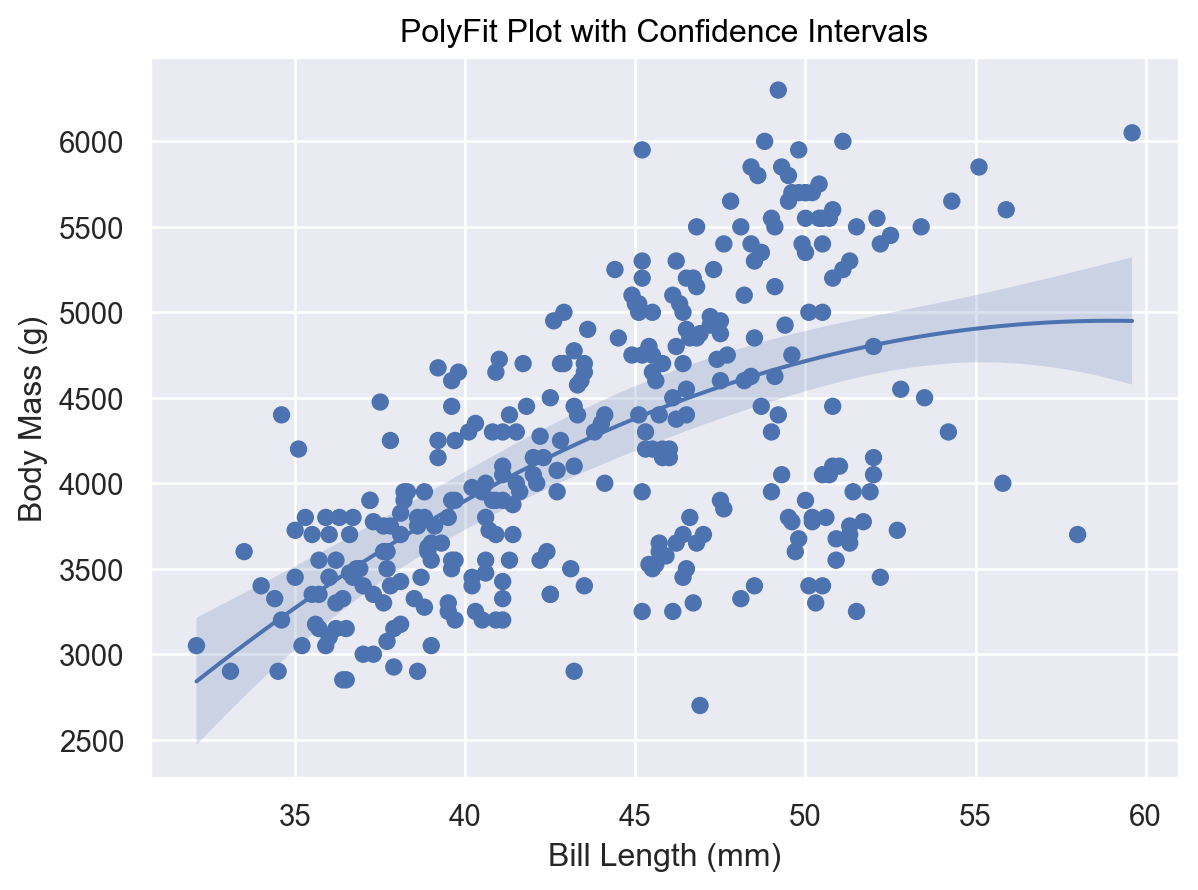

In [3]:
plot = (
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(
        so.Line(), PolyFitWithCI := sor.PolyFitWithCI(order=2, gridsize=100, alpha=0.05)
    )
    .add(so.Band(), PolyFitWithCI)
    .label(
        x="Bill Length (mm)",
        y="Body Mass (g)",
        title="PolyFit Plot with Confidence Intervals",
    )
)
plot

Note the need for a `.add(so.Band()...)` geometry. seaborn.objects thinks of the regression line as a `so.Line()` geometry, while the confidence interval is a `so.Band()` geometry. 

To prevent having to fit the model twice, we use the "Walrus Operator" (`:=`). The Walrus Operator (turn it sideways and imagine the colon dots are eyes and the bars of the equals sign are tusks) allows the user to BOTH pass a Python object as a function argument AND save it to a variable. Here, we're passing `sor.PolyFitWithCI(order=2, gridsize=100, alpha=0.05)` as the second argument in `.add(so.Line(), ...)` and also assigning it to the variable `PolyFitWithCI`, which we then use again to pass the same object in `.add(so.Band(), ...)`. It's a little clumsy, but works!

### Lowess Regression with Confidence Intervals

And here's a lowess regression with confidence intervals!

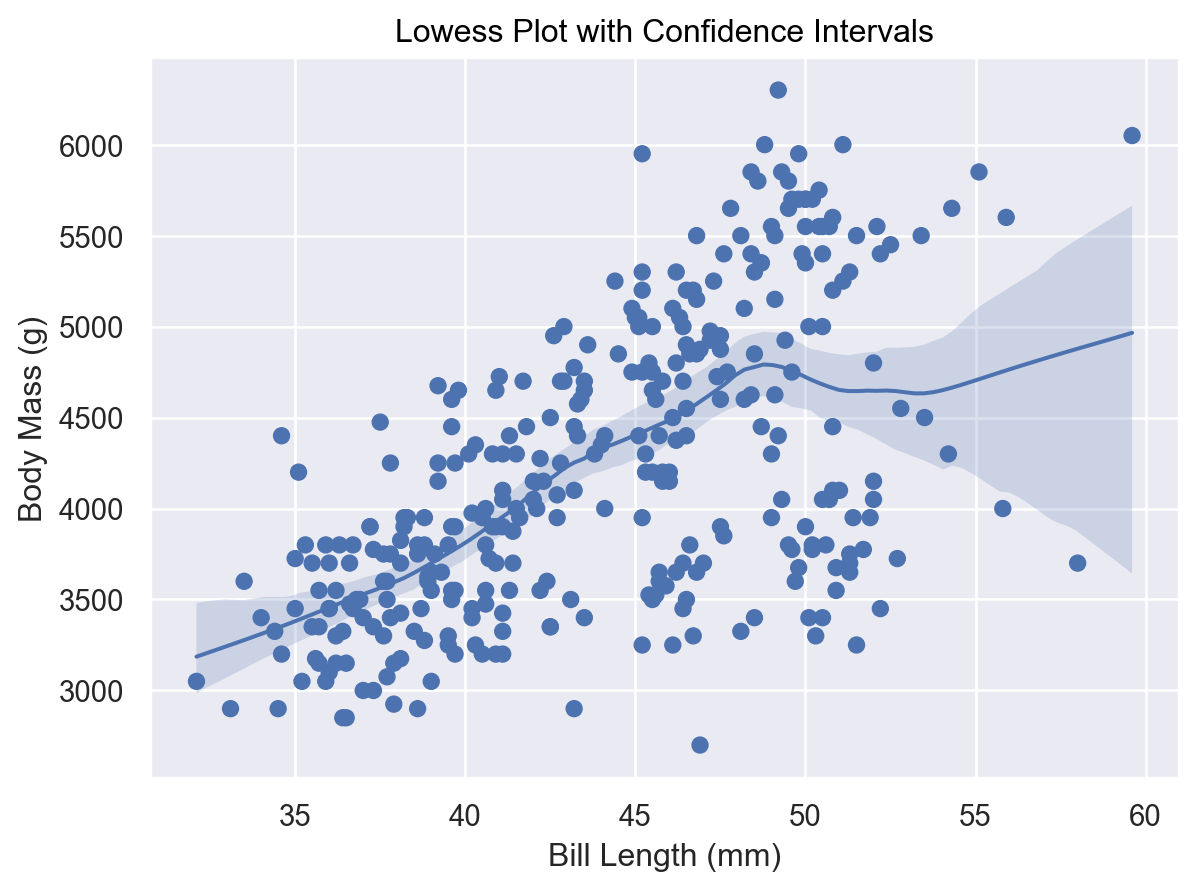

In [4]:
plot = (
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.4, gridsize=100, num_bootstrap=200, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .label(
        x="Bill Length (mm)",
        y="Body Mass (g)",
        title="Lowess Plot with Confidence Intervals",
    )
)
plot